# Twitter Data EDA

The data is collected using the following key words

- inflation
- fuelprice
- fuelpricehike
-  fuelprices
- fuelshortage
- foodprice
-  oilprice
- oilprices
- cookingoilprice
- unemployment
- unemploymentrate
- economiccrisis
- economichardship

---

* our goal is to Explore the data for two machine learning tasks
1. Topic modeling
2. Sentiment Analysis

## Handle imports

In [2]:
%cd ../

/home/hat/dev-env/10Acadamy/week_0/Twitter-Data-Analysis


In [3]:
# extrenal modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import json
# custom modules
from clean_tweets_dataframe import Clean_Tweets
from extract_dataframe import read_json, TweetDfExtractor

%matplotlib inline

## Data Acquisition

We already have a data transformation module (Data Consistency module) `extract_dataframe`
That will be used to Transform the JSON data into a pandas dataframe.
If this step is already run, it would simply read a CSV that it cached 
on the previous run.

In [4]:
def get_extracted_data() -> pd.DataFrame:
    csv_path = 'processed_tweet_data.csv'
    if not os.path.exists(csv_path):
        data_path = "data/Economic_Twitter_Data.json"
        tweets_num, tweet_list = read_json(data_path)
        print(f"Oiginal tweets count is {tweets_num}")
        tweet = TweetDfExtractor(tweet_list)
        tweet_df = tweet.get_tweet_df(save=True)
        
    else:
        tweet_df = pd.read_csv(csv_path)
    print(f"shape: {tweet_df.shape}")
    print(tweet_df.info())
    return tweet_df


tweet_df = get_extracted_data()

shape: (24637, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24637 entries, 0 to 24636
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          24637 non-null  object 
 1   source              24633 non-null  object 
 2   original_text       24633 non-null  object 
 3   polarity            24625 non-null  object 
 4   subjectivity        24625 non-null  float64
 5   lang                24625 non-null  object 
 6   favorite_count      24625 non-null  object 
 7   retweet_count       24625 non-null  float64
 8   original_author     24625 non-null  object 
 9   followers_count     24618 non-null  object 
 10  friends_count       24625 non-null  object 
 11  possibly_sensitive  9982 non-null   object 
 12  hashtags            24624 non-null  object 
 13  user_mentions       24617 non-null  object 
 14  place               15724 non-null  object 
dtypes: float64(2), object(13)
memory u

* As we can see, there are lots of missing values and columns with the wrong datatypes. We have the Clean_Tweets class to handle this for us. 

In [5]:
tweet_df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Fri Apr 22 22:20:18 +0000 2022,Twitter for Android,RT @nikitheblogger: Irre: Annalena Baerbock sa...,0.0,0.0,de,0,355.0,McMc74078966,3,12,NaN,[],['nikitheblogger'],NaN
1,Fri Apr 22 22:19:16 +0000 2022,Twitter for Android,RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...,0.0,0.0,de,0,505.0,McMc74078966,3,12,NaN,[],['sagt_mit'],NaN
2,Fri Apr 22 22:17:28 +0000 2022,Twitter for Android,RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...,0.0,0.0,de,0,4.0,McMc74078966,3,12,NaN,[],"['Kryptonoun', 'WRi007']",NaN
3,Fri Apr 22 22:17:20 +0000 2022,Twitter for Android,RT @WRi007: Die #Deutschen sind ein braves Vol...,0.0,0.0,de,0,332.0,McMc74078966,3,12,NaN,"['Deutschen', 'Spritpreisen', 'inflation', 'Ab...",['WRi007'],NaN
4,Fri Apr 22 22:13:15 +0000 2022,Twitter for Android,RT @RolandTichy: Baerbock verkündet mal so neb...,0.0,0.0,de,0,386.0,McMc74078966,3,12,NaN,[],['RolandTichy'],NaN


### Missing entries

- Count total missing value
- See which columns have missing values
- Plot the number of missing values in columns

In [13]:
missing_count = tweet_df.isnull().sum()
cols_with_missing = tweet_df.columns[tweet_df.isnull().any()]

print(f"Missing value(s) count: \n{missing_count}")
print(f"Columns having missing value(s): {cols_with_missing}")

Missing value(s) count: 
created_at                0
source                    4
original_text             4
polarity                 12
subjectivity             12
lang                     12
favorite_count           12
retweet_count            12
original_author          12
followers_count          19
friends_count            12
possibly_sensitive    14655
hashtags                 13
user_mentions            20
place                  8913
dtype: int64
Columns having missing value(s): Index(['source', 'original_text', 'polarity', 'subjectivity', 'lang',
       'favorite_count', 'retweet_count', 'original_author', 'followers_count',
       'friends_count', 'possibly_sensitive', 'hashtags', 'user_mentions',
       'place'],
      dtype='object')


<AxesSubplot:>

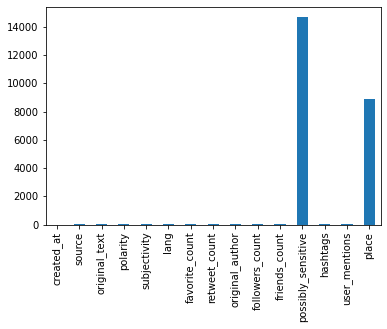

In [17]:
missing_count.plot(kind='bar')

In [23]:
tweet_df[tweet_df['polarity'] == '0.0'].shape

(15289, 15)

In [ ]:
cleaner = Clean_Tweets(tweet_df)
# cleaner.run_pipeline()
print(cleaner.df.info())

In [ ]:
cleaner.df.head()

In [ ]:
cleaned_df = cleaner.df

In [ ]:
cleaned_df.sort_values('created_at', ascending=True, inplace=True, ignore_index=True)
cleaned_df.loc[0, 'created_at'], cleaned_df.loc[len(cleaned_df)-1, 'created_at']

The timeline for the data we have is between 07-Jan-2021 upto 22-Apr-2022

### ratio of android vs iphone users

In [ ]:
# tweet_df.plot(kind='bar', y='polarity')

In [ ]:
from collections import Counter
sources = {**Counter(tweet_df.source.values.tolist())}
fig = plt.figure(figsize=(25, 10))
plt.xticks(rotation=90, fontsize=15)
plt.bar(sources.keys(), sources.values())

In [ ]:
# sources_df = pd.DataFrame({**sources}, index=range(len(sources)))
# sources_df.plot(kind="bar")